In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df=pd.read_excel('social_media_engagement_data_corregido.xlsx')

# Convertir la columna Fecha_Post a tipo datetime
df['Fecha_Post'] = pd.to_datetime(df['Fecha_Post'])

# Seleccionar únicamente las columnas numéricas para la agrupación
numeric_columns = df.select_dtypes(include=['number']).columns

# Incluir la columna Fecha_Post para agrupar pero no sumarla
df_grouped = df.groupby(df['Fecha_Post'].dt.to_period('M'))[numeric_columns].mean()

# Convertir de PeriodIndex a un índice de tipo Timestamp
df_grouped = df_grouped.to_timestamp()

# Verificar el DataFrame resultante
print(df_grouped.head())

                 Likes  Comentarios  Compartidos  Impresiones      Alcance  \
Fecha_Post                                                                   
2021-03-01  498.731434   243.564222    98.675385  5488.974311  4165.463802   
2021-04-01  495.702782   247.799048   101.642387  5525.468521  4187.394949   
2021-05-01  505.135789   255.686667    99.330526  5408.123509  4095.202807   
2021-06-01  495.275416   246.277634   100.239556  5571.031793  4209.775970   
2021-07-01  495.894792   251.870675   100.579518  5502.288361  4144.917511   

            Engagement Rate  Edad_Audiencia  
Fecha_Post                                   
2021-03-01         0.288610       41.474078  
2021-04-01         0.288696       41.726208  
2021-05-01         0.297207       41.621053  
2021-06-01         0.280414       41.096858  
2021-07-01         0.297579       41.442852  


In [14]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2021-03-01 to 2024-03-01
Freq: MS
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Likes            37 non-null     float64
 1   Comentarios      37 non-null     float64
 2   Compartidos      37 non-null     float64
 3   Impresiones      37 non-null     float64
 4   Alcance          37 non-null     float64
 5   Engagement Rate  37 non-null     float64
 6   Edad_Audiencia   37 non-null     float64
dtypes: float64(7)
memory usage: 2.3 KB


In [15]:
df_grouped.tail()

,Likes,Comentarios,Compartidos,Impresiones,Alcance,Engagement Rate,Edad_Audiencia
Fecha_Post,,,,,,,
2023-11-01,503.321071,245.744286,101.163571,5459.452857,4145.726429,0.288036,41.342500
2023-12-01,501.350193,253.774851,100.617141,5551.940639,4204.398665,0.291737,41.654724
2024-01-01,497.778893,249.159170,100.395502,5450.022491,4131.477509,0.285139,41.533564
2024-02-01,495.471677,248.288782,102.104776,5498.015920,4161.502036,0.288113,41.365790
2024-03-01,500.035982,251.736132,97.509745,5323.590705,4034.979010,0.293747,40.865067


In [16]:
df_grouped = df_grouped.drop(df_grouped.index[-1])

In [17]:
df_grouped.tail()

,Likes,Comentarios,Compartidos,Impresiones,Alcance,Engagement Rate,Edad_Audiencia
Fecha_Post,,,,,,,
2023-10-01,501.603130,253.470609,97.726957,5507.476522,4164.019130,0.289962,41.568348
2023-11-01,503.321071,245.744286,101.163571,5459.452857,4145.726429,0.288036,41.342500
2023-12-01,501.350193,253.774851,100.617141,5551.940639,4204.398665,0.291737,41.654724
2024-01-01,497.778893,249.159170,100.395502,5450.022491,4131.477509,0.285139,41.533564
2024-02-01,495.471677,248.288782,102.104776,5498.015920,4161.502036,0.288113,41.365790


In [20]:
df_grouped['interacciones']=df_grouped['Likes']+df_grouped['Comentarios']+df_grouped['Compartidos']

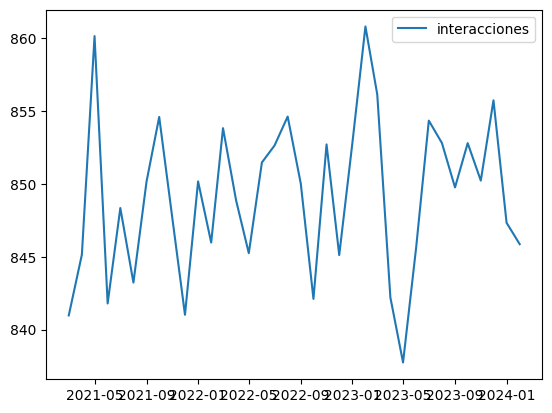

In [23]:
plt.plot(df_grouped['interacciones'], label='interacciones')
#plt.plot(forecast, label='Proyección', color='red')
plt.legend()
plt.show()

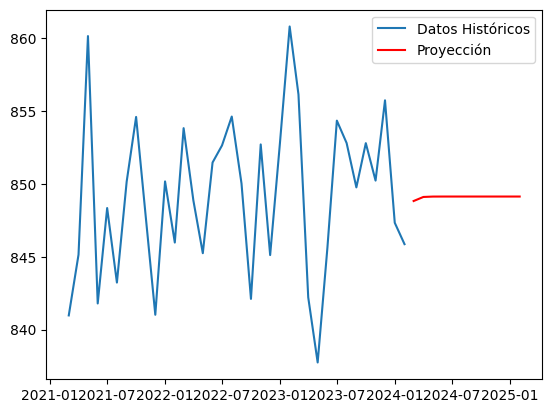

In [24]:

# Seleccionar la métrica a proyectar (por ejemplo, Impresiones)
data = df_grouped['interacciones']

# Crear y ajustar el modelo ARIMA
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Realizar predicciones para el próximo año (12 meses)
forecast = model_fit.forecast(steps=12)

# Visualizar los resultados
plt.plot(data, label='Datos Históricos')
plt.plot(forecast, label='Proyección', color='red')
plt.legend()
plt.show()